In [1]:
import sys

sys.path.append("../src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from scipy.integrate import quad
from scipy.optimize import minimize
import sto_ng
import gaussian_overlap_function
import h5py
from scipy.linalg import eigh


importlib.reload(sto_ng)
importlib.reload(gaussian_overlap_function)
from sto_ng import *
from gaussian_overlap_function import *

In [3]:
alphas = [0.297104, 1.236745, 5.749982, 38.216677]

In [4]:
RA = np.zeros(3)
RB = np.zeros(3)
RC = np.zeros(3)
RD = np.zeros(3)
C = [0.5, 0.5, 0.5, 0.5]


def get_H_matrix(C, alphas, RA, RB, RC, RD):
    H_mat = np.zeros((4, 4))
    for p in range(4):
        for q in range(4):
            H_mat[p, q] += GaussianOverlapFunction.T(alphas[p], alphas[q], RA, RB)
            H_mat[p, q] += 2 * GaussianOverlapFunction.V(
                alphas[p], alphas[q], RA, RB, RC
            )
            for r in range(4):
                for s in range(4):
                    H_mat[p, q] += (
                        C[r]
                        * C[s]
                        * GaussianOverlapFunction.U(
                            alphas[p], alphas[r], alphas[q], alphas[s], RA, RB, RC, RD
                        )
                    )
    return H_mat


def get_h_matrix(C, alphas, RA, RB, RC, RD):
    h_mat = np.zeros((4, 4))
    for p in range(4):
        for q in range(4):
            h_mat[p, q] += GaussianOverlapFunction.T(alphas[p], alphas[q], RA, RB)
            h_mat[p, q] += 2 * GaussianOverlapFunction.V(
                alphas[p], alphas[q], RA, RB, RC
            )
    return h_mat


def get_Q_matrix(C, alphas, RA, RB, RC, RD):
    Q_mat = np.zeros((4, 4))
    for p in range(4):
        for q in range(4):
            for r in range(4):
                for s in range(4):
                    Q_mat[p, q] += (
                        C[r]
                        * C[s]
                        * GaussianOverlapFunction.U(
                            alphas[p], alphas[r], alphas[q], alphas[s], RA, RB, RC, RD
                        )
                    )
    return Q_mat


def get_S_matrix(alphas, RA, RB):
    S_mat = np.zeros((4, 4))
    for p in range(4):
        for q in range(4):
            S_mat[p, q] = GaussianOverlapFunction.S(alphas[p], alphas[q], RA, RB)
    return S_mat

In [5]:
H_matrix = get_H_matrix(C, alphas, RA, RB, RC, RD)
S_matrix = get_S_matrix(alphas, RA, RB)
eigh(H_matrix, S_matrix)

(array([ 2.19132849,  3.89695206, 11.64969959, 65.37052032]),
 array([[  0.32965791,   0.23998687,  -0.13839282,   0.04883983],
        [ -0.2252323 ,  -1.11783772,   1.14980156,  -0.42929561],
        [  0.2727786 ,  -0.12629174,  -3.75722133,   2.68465017],
        [  0.03919774,  -0.40673993,  -0.07839216, -13.73978245]]))

In [6]:
for i in range(10):
    # H_matrix = get_H_matrix(C, alphas, RA, RB, RC, RD)
    h_matrix = get_h_matrix(C, alphas, RA, RB, RC, RD)
    Q_matrix = get_Q_matrix(C, alphas, RA, RB, RC, RD)
    H_matrix = h_matrix + Q_matrix
    S_matrix = get_S_matrix(alphas, RA, RB)
    val, vec = eigh(H_matrix, S_matrix)
    C = vec[:, 0]
    print(val[0])

2.191328494294655
-1.2978087927545534
-0.8394468976549807
-0.9360800359077255
-0.9082953376622578
-0.9157829711944635
-0.913727358600438
-0.9142888692998127
-0.9141352760896789
-0.9141772735196704


In [7]:
val[0] * 27.21

-24.874763612470232

In [8]:
h_matrix = get_h_matrix(C, alphas, RA, RB, RC, RD)
Q_matrix = get_Q_matrix(C, alphas, RA, RB, RC, RD)
energy = np.dot(C, np.dot(h_matrix, C)) + 0.5 * np.dot(C, np.dot(Q_matrix, C))

In [9]:
energy * 2

-2.8551603556406135

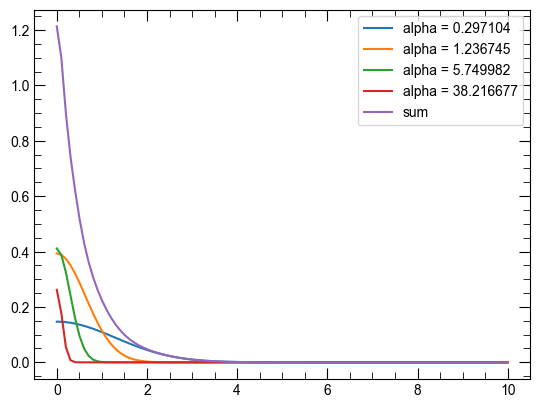

In [10]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 100)
y = np.zeros(100)
for i in range(4):
    y_i = C[i] * np.exp(-alphas[i] * x**2)
    y += y_i
    ax.plot(x, y_i, label=f"alpha = {alphas[i]}")
ax.plot(x, y, label="sum")
ax.legend()